<a href="https://colab.research.google.com/github/AbuTalhaGT/ML-Algorithms/blob/main/CurseOfDimensionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Curse of Dimensionality

Dimensionally cursed phenomena occur in domains such as numerical analysis, sampling, combinatorics, machine learning, data mining and databases. The common theme of these problems is that when the dimensionality increases, the volume of the space increases so fast that the available data become sparse. In order to obtain a reliable result, the amount of data needed often grows exponentially with the dimensionality. Also, organizing and searching data often relies on detecting areas where objects form groups with similar properties; in high dimensional data, however, all objects appear to be sparse and dissimilar in many ways, which prevents common data organization strategies from being efficient.

Ref: https://en.wikipedia.org/wiki/Curse_of_dimensionality

**Dimension reduction** is to create a new dimension data set by reducing the dimension of a multidimensional data set composed of very many features. In general, as the dimension increases, the distance between data points becomes exponentially farther, and it has a sparse structure. In the case of a data set consisting of hundreds or more features, the prediction reliability is lower than that of a model trained on relatively few dimensions. Also, if there are many features, the correlation between individual features is likely to be high. In a linear model such as linear regression, when the correlation between input variables is high, the predictive performance of the model decreases due to the multicollinearity problem.

In this notebook, we summarize the dimensionality reduction methods that can interpret data more intuitively by reducing features by reducing the dimensions of multidimensional features.

The dataset uses the commonly used MNIST dataset. The MNIST dataset we commonly use has a size of 28x28
. When looking at this dataset through dimensionality reduction, we will check if there is any regularity and how labels are clustered according to each dimensionality reduction method.

Notebook Credit : https://www.kaggle.com/code/ohseokkim/the-curse-of-dimensionality-dimension-reduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



### The effect of each dimension reduction is identified using the MNIST dataset.


In [2]:
import torch
from torchvision import datasets, transforms

# Define the transformations (e.g., normalizing the images)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the MNIST dataset using torchvision
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Get the training and testing data and labels (like Keras)
train_x = train_dataset.data
train_y = train_dataset.targets
test_x = test_dataset.data
test_y = test_dataset.targets

# Convert to the same format as Keras (numpy arrays)
train_x = train_x.numpy()
train_y = train_y.numpy()
test_x = test_x.numpy()
test_y = test_y.numpy()

print(train_x.shape, train_y.shape)  # Check the shape of the dataset
print(test_x.shape, test_y.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Checking train dataset

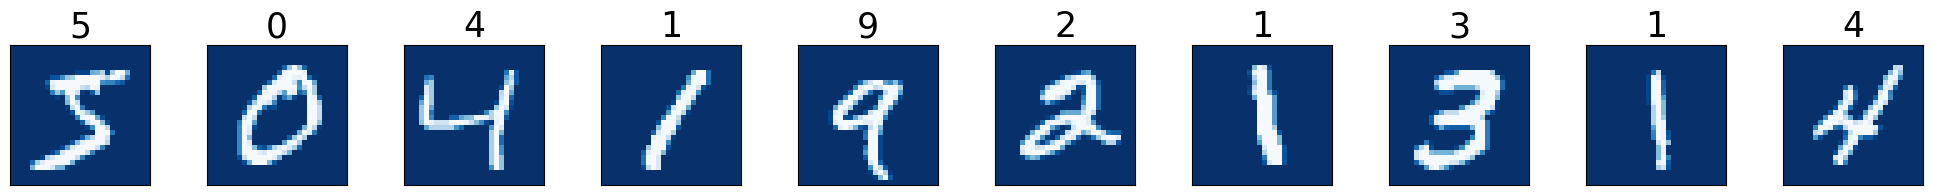

In [3]:
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(train_x[idx], cmap='Blues_r')
    ax.set_title(str(train_y[idx]),fontsize=25)

In [4]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

This code displays an MNIST image (train_x[0]), and for each pixel, it annotates the pixel value on the image, showing the values in white if the pixel is darker than a threshold (thresh) and black if it’s brighter.

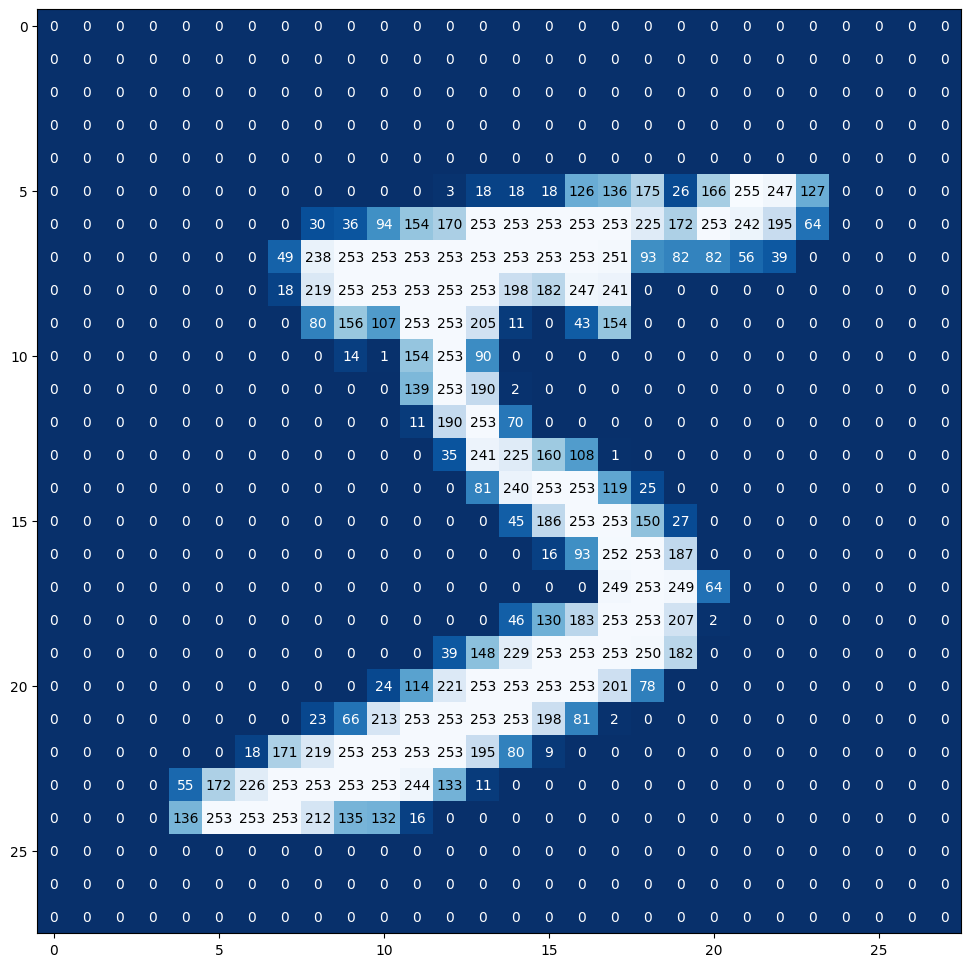

In [5]:
img = train_x[0]

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='Blues_r')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')


In [6]:
# Reshape to 2D data
train_x = train_x.reshape(train_x.shape[0], -1)
print(train_x.shape)

sample_size = 5000
# Use only the top 1000 data for training
train_x = pd.DataFrame(train_x[:sample_size, :])
train_y = train_y[:sample_size]

(60000, 784)


## PCA

PCA is the most representative method of dimensionality reduction. This is a method of re-axis of multidimensional data in the direction of large variance. The greater the dependence between variables, the smaller the principal component can represent the original data. However, since it is assumed that each feature follows a normal distribution, it is not appropriate to apply a variable with a distorted distribution to PCA.

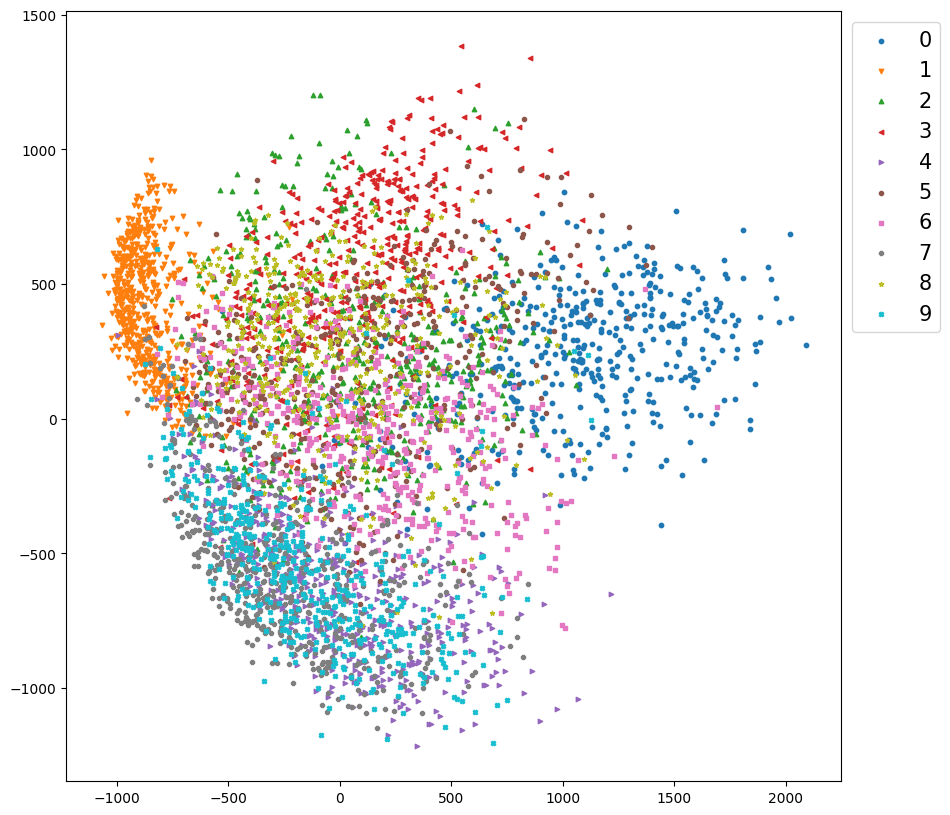

In [7]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(train_x)
markers=['o','v','^','<','>','8','s','P','*','X']
# plot in 2D by class
plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_pca[mask, 0], x_pca[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

## Truncated SVD

Truncated SVD is a method of extracting and decomposing only the upper part of the diagonal elements in the sigma matrix, that is, the upper part of the singular values. With this decomposition, the original matrix cannot be accurately restored because it artificially decomposes U∑VT
of smaller dimensions. However, despite the data information being compressed and decomposed, it is possible to approximate the original matrix to a considerable degree

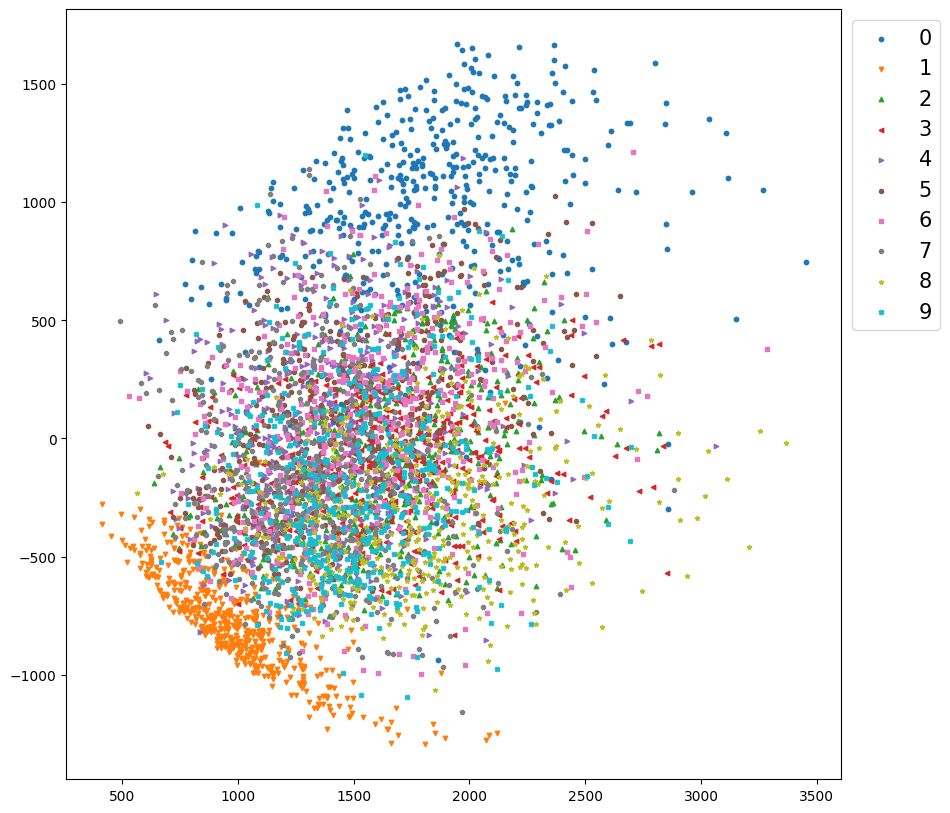

In [8]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD()
x_tsvd = tsvd.fit_transform(train_x)
markers=['o','v','^','<','>','8','s','P','*','X']
# plot in 2D by class
plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_tsvd[mask, 0], x_tsvd[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

### **NMF (Non-Negative Matrix Factorization)**:
NMF is a **matrix factorization technique** used for **dimensionality reduction** and **data decomposition**. It is similar to other methods like **SVD (Singular Value Decomposition)**, but with a key difference: **NMF requires that all values in the matrices be non-negative** (i.e., no negative numbers).

### Matrix Decomposition in NMF:
NMF attempts to **decompose** a given data matrix `V` into two smaller matrices `W` and `H`, such that: V ≈ W × H



Where:
- `V` is the original data matrix.
- `W` represents the **relationship between the original data and the latent components**.
- `H` represents **how the latent components are made up of the original features**.

### **Key Properties**:
1. **Non-Negativity**:
   - In NMF, **all elements** in the matrices `W`, `H`, and `V` must be **non-negative**.
   - This is particularly useful for data like images or documents where negative values do not make sense.

2. **Latent Components**:
   - NMF uncovers **latent components** (hidden features) in the data.
   - For example, in a dataset of images, the latent components might represent common features like edges or shapes.

### **W and H Matrix Meaning**:
- **W Matrix**:
  - Each row in `W` represents how strongly a **data point** (row in `V`) is associated with the **latent components**.
  
- **H Matrix**:
  - Each column in `H` represents how the **latent components** are composed of the **original features**.

### Example:
Suppose we have a matrix `V` representing **users' movie ratings**. By applying NMF, we decompose `V` into:
- **W**: Each row tells us how much a user likes different **latent factors** (e.g., "action" or "romantic" movie preferences).
- **H**: Each column tells us how strongly a movie represents each of those **latent factors** (e.g., how "action-packed" or "romantic" a movie is).

### Comparison to SVD:
- **SVD**: Decomposes `V` into `U × Σ × V^T`, where values can be **positive or negative**.
- **NMF**: Ensures that all values in `W` and `H` are **non-negative**, making it more interpretable in cases where negative values don't make sense (e.g., pixel intensities in images).


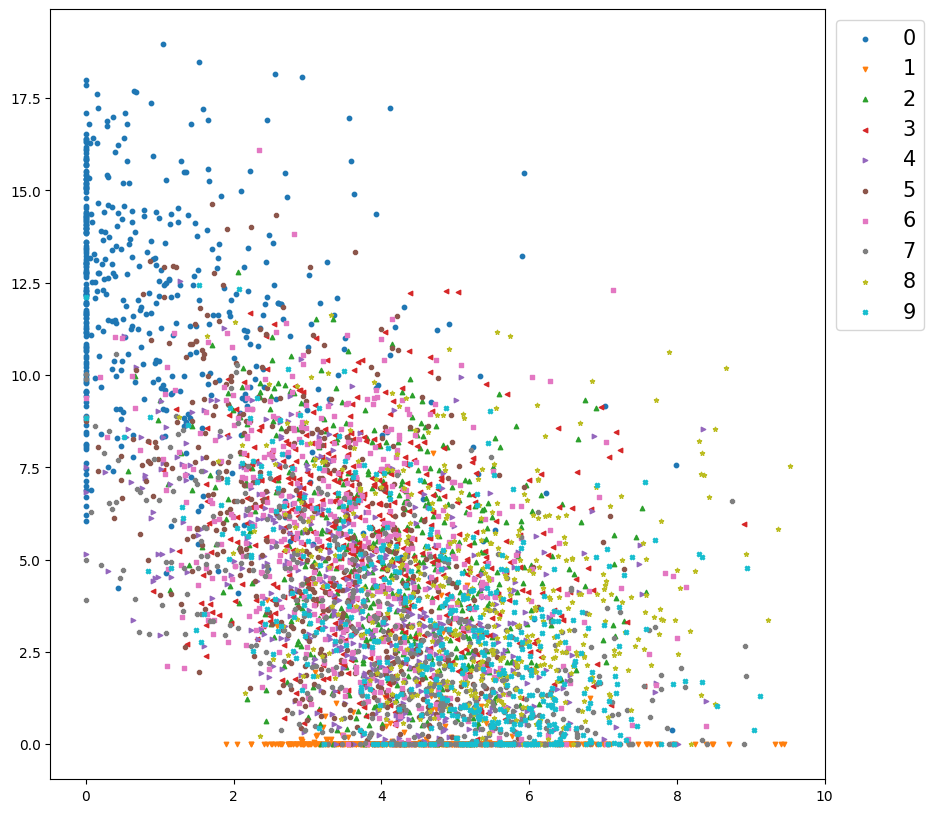

In [9]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=2, init='random', random_state=0)
x_nmf = nmf.fit_transform(train_x)
markers=['o','v','^','<','>','8','s','P','*','X']
# plot in 2D by class
plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_nmf[mask, 0], x_nmf[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

## LDA

LDA is a method of dimensionality reduction in the classification problem of supervised learning. It finds a low-dimensional feature space that can classify the training data well, and reduces the dimensionality by projecting the original features into that space.

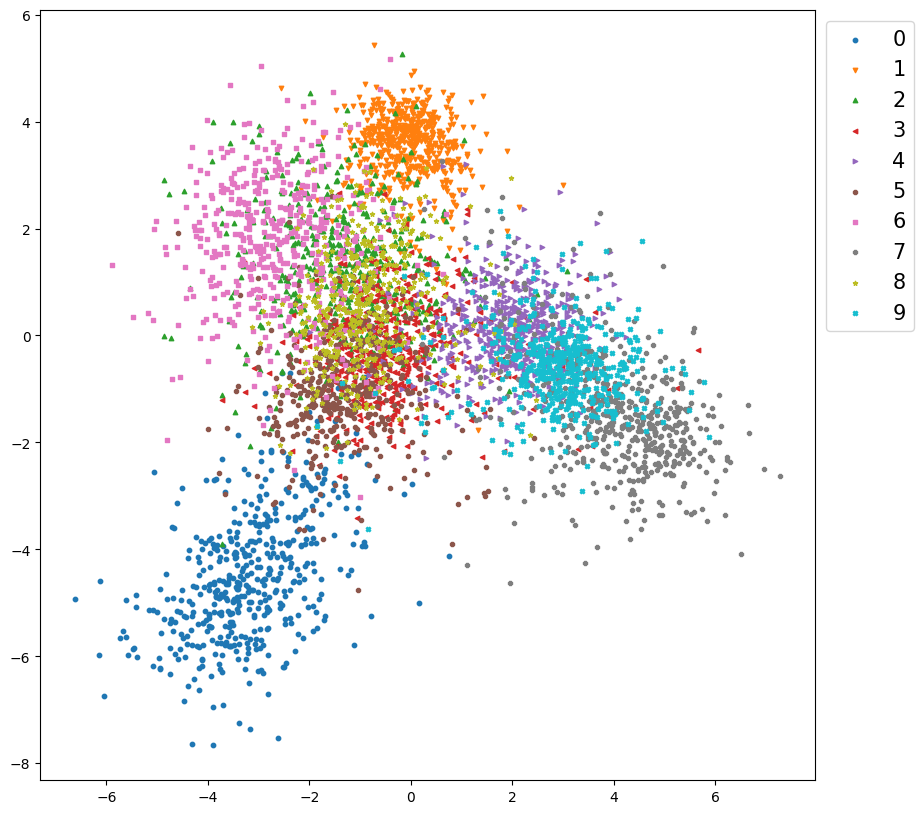

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
x_lda = lda.fit_transform(train_x, train_y)

plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_lda[mask, 0], x_lda[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)


## t-SNE

t-SNE is often used for visualization purposes by compressing data on a two-dimensional plane. Points that are close to the original feature space are also expressed in a two-dimensional plane after compression. Since the nonlinear relationship can be identified, the model performance can be improved by adding the compression results expressed by these t-SNEs to the original features. However, since the computation cost is high, it is not suitable for compression exceeding two or three dimensions.

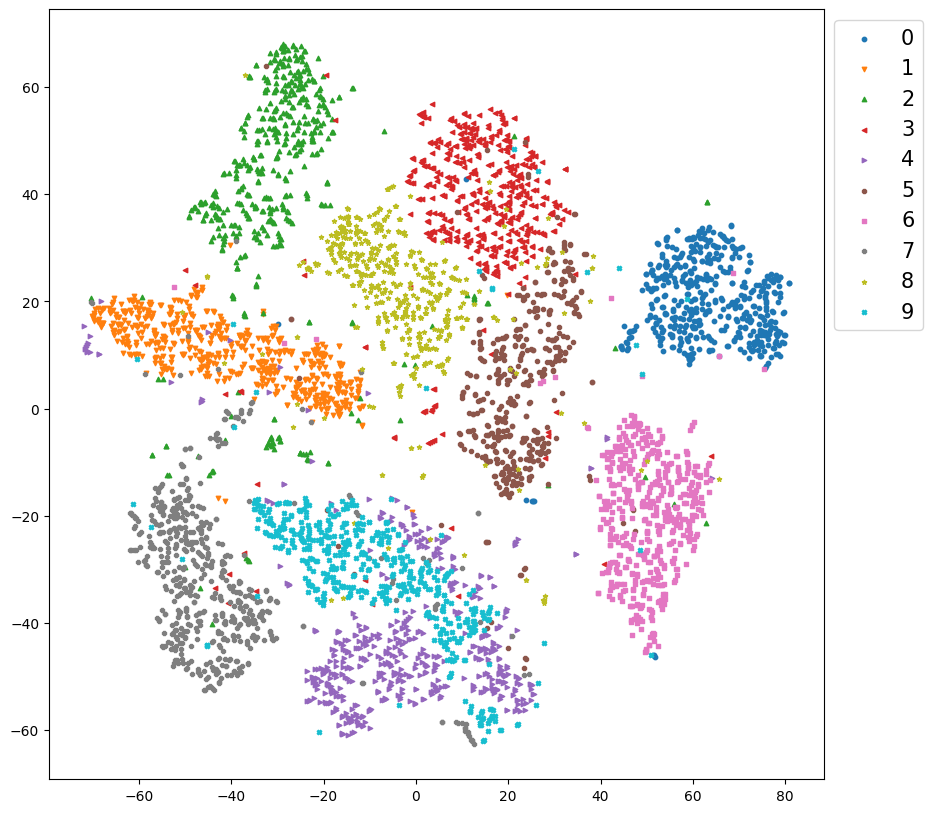

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(train_x)

plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_tsne[mask, 0], x_tsne[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)


### The same figure I have plotted again but it looks more appealing.

<ipython-input-12-ca377eb696b7>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 10).colors  # Get 10 different colors for the 10 classes


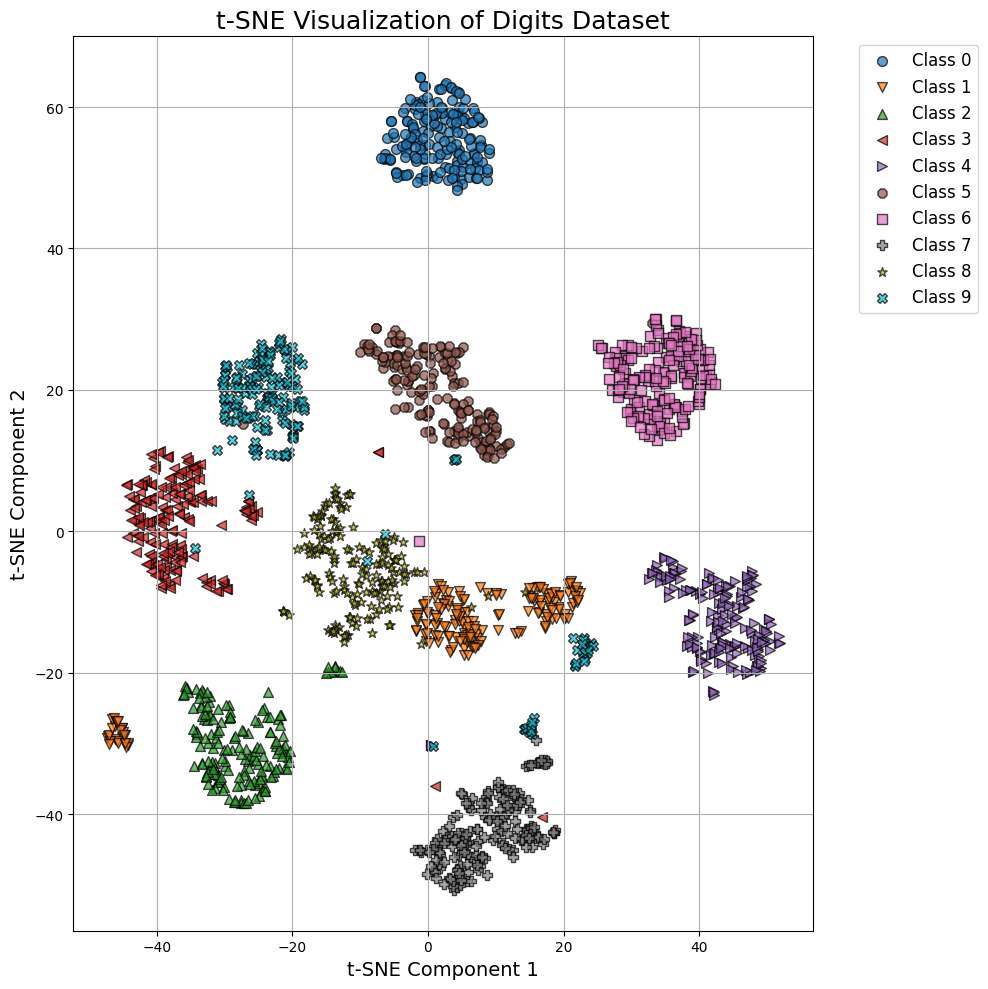

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

# Load the digits dataset (you can replace this with your train_x and train_y)
digits = load_digits()
train_x = digits.data
train_y = digits.target

# Marker styles for different classes (0-9 in this case)
markers = ['o', 'v', '^', '<', '>', '8', 's', 'P', '*', 'X']
colors = plt.cm.get_cmap('tab10', 10).colors  # Get 10 different colors for the 10 classes

# Run t-SNE to reduce the dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(train_x)

# Create a figure for the plot
plt.figure(figsize=(10, 10))

# Plot each class with a different marker and color
for i, marker in enumerate(markers):
    mask = train_y == i  # Get data points corresponding to class 'i'
    plt.scatter(x_tsne[mask, 0], x_tsne[mask, 1], label=f"Class {i}", marker=marker, s=50, color=colors[i], alpha=0.7, edgecolor='k')

# Customize the plot
plt.title("t-SNE Visualization of Digits Dataset", fontsize=18)
plt.xlabel("t-SNE Component 1", fontsize=14)
plt.ylabel("t-SNE Component 2", fontsize=14)

# Display legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Adding grid for a more structured view
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

## UMAP

UMAP (Uniform Manifold Approximation and Projection), which is faster than t-SNE and separates the data space well, has been proposed for nonlinear dimensionality reduction. In other words, it can process very large datasets quickly and is suitable for sparse matrix data. Furthermore, compared to t-SNE, it has the advantage of being able to embed immediately when new data comes in from other machine learning models.

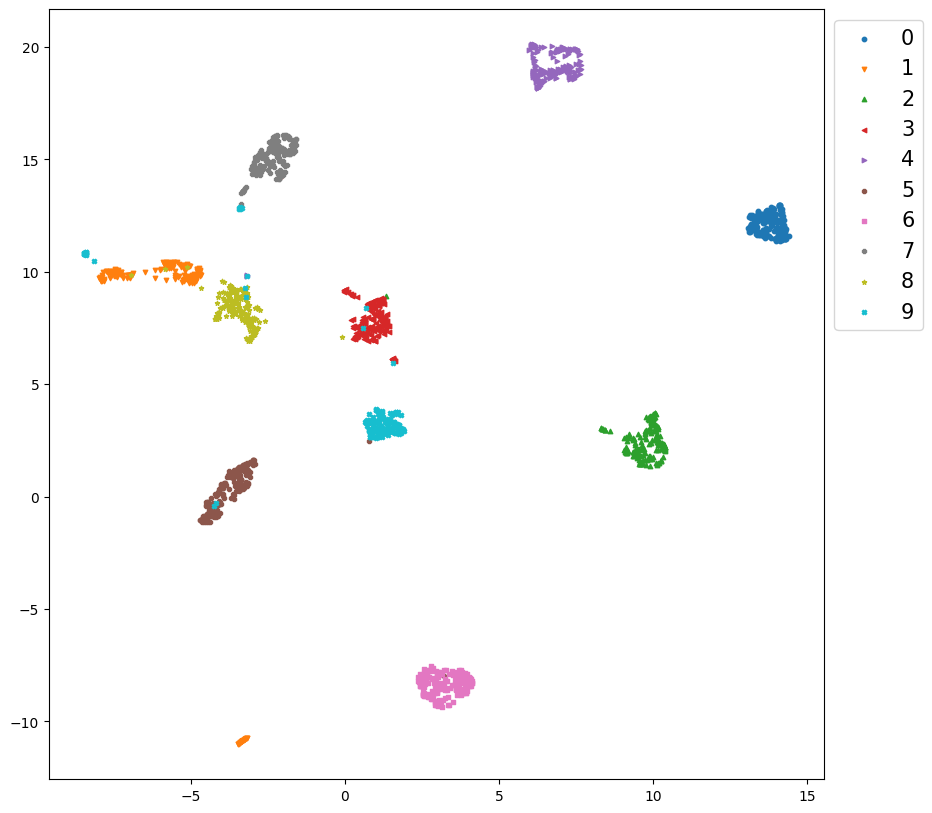

In [13]:
import umap

um = umap.UMAP()
x_umap = um.fit_transform(train_x)

plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_umap[mask, 0], x_umap[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)


## UMAP connectivity plot

UMAP works by constructing an intermediate topological representation of the approximate manifold the data may have been sampled from. In practice this structure can be simplified down to a weighted graph. Sometimes it can be beneficial to see how that graph (representing connectivity in the manifold) looks with respect to the resulting embedding. It can be used to better understand the embedding, and for diagnostic purposes.

Ref: https://umap-learn.readthedocs.io


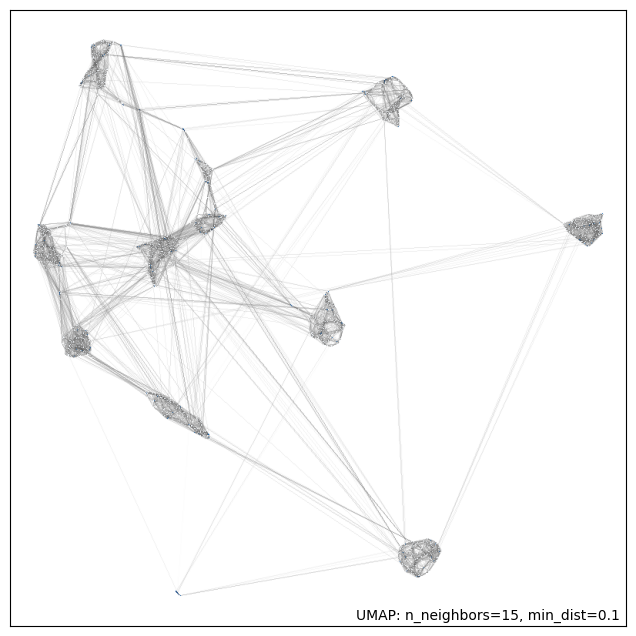

In [17]:
import umap.plot
import matplotlib.pyplot as plt
%matplotlib inline
# imports matplotlib explicitly which is required by umap.plot

mapper = umap.UMAP().fit(train_x)
umap.plot.connectivity(mapper, show_points=True)
plt.show()
# uses matplotlib to display the plot generated by umap


## Another UMAP Plot

<Axes: >

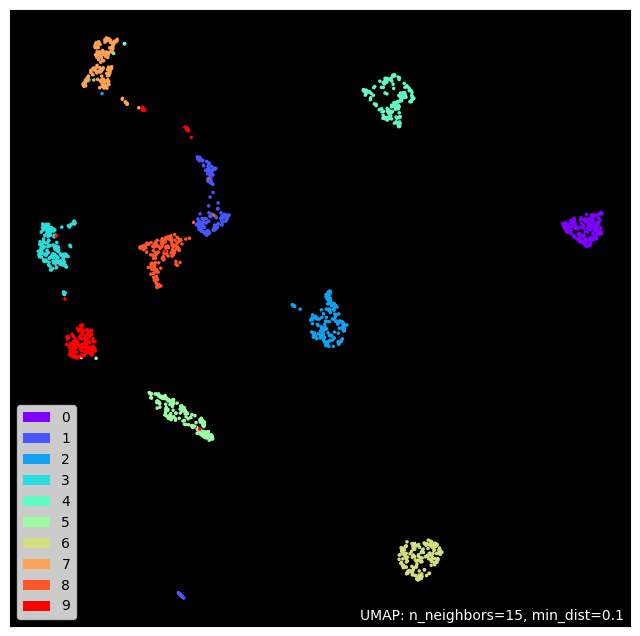

In [18]:
umap.plot.points(mapper, labels=train_y, theme='fire')

It looks like an orderly universe. A few galaxies seem to be visible as well.

## UMAP 3D Plot

In [20]:
import plotly
import plotly.express as px
from umap import UMAP

umap_3d = UMAP(n_components=3, init='random', random_state=42)
x_umap = umap_3d.fit_transform(train_x)
umap_df = pd.DataFrame(x_umap)
train_y_sr = pd.Series(train_y,name='label')
print(type(x_umap))
new_df = pd.concat([umap_df,train_y_sr],axis=1)
fig = px.scatter_3d(
    new_df, x=0, y=1, z=2,
    color='label', labels={'color': 'number'}
)
fig.update_traces(marker_size=1)
fig.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



<class 'numpy.ndarray'>




## The figure above was drawn by reducing the dimension to 3D with UMAP.

**If you compare it with the previous two-dimensional plot, you can see that it is visually complex and the points are distributed sparsely in space. If the dimension is increased further, the above phenomenon will become more severe.**

**It's a small experiment, but we've experienced the curse of a dimension.**


## AutoEncoder

AutoEncoder is a dimension reduction method using a neural network. By learning a neural network that outputs the same value as the input using an intermediate layer smaller than the input dimension, a lower-dimensional representation that can reproduce the original data can be learned.



In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the Autoencoder network
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 4, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(4, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  # To ensure output is between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Hyperparameters
batch_size = 64
learning_rate = 1e-3
num_epochs = 5

# Data preparation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Initialize the model, loss function, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        output = model(img)
        # Compute loss
        loss = criterion(output, img)
        # Backward pass
        loss.backward()
        # Update weights
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Save the model
torch.save(model.state_dict(), 'autoencoder.pth')

Epoch [1/5], Loss: 0.8464
Epoch [2/5], Loss: 0.8384
Epoch [3/5], Loss: 0.8369
Epoch [4/5], Loss: 0.8391
Epoch [5/5], Loss: 0.8380


In [ ]:
# import torch
# import torch.nn as nn
# import pandas as pd
# import numpy as np
# import torchvision.transforms as transforms
# from PIL import Image
# import matplotlib.pyplot as plt

# # Define the Autoencoder network (same as before)
# class Autoencoder(nn.Module):
#     def __init__(self):
#         super(Autoencoder, self).__init__()
#         # Encoder
#         self.encoder = nn.Sequential(
#             nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(16, 4, kernel_size=3, stride=2, padding=1),
#             nn.ReLU()
#         )
#         # Decoder
#         self.decoder = nn.Sequential(
#             nn.ConvTranspose2d(4, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
#             nn.Sigmoid()  # Ensure output is between 0 and 1
#         )

#     def forward(self, x):
#         x = self.encoder(x)
#         x = self.decoder(x)
#         return x

# # Load the trained model
# model = Autoencoder()
# model.load_state_dict(torch.load('autoencoder.pth'))  # Load model weights
# model.eval()  # Set to evaluation mode

# # Function to load and preprocess data from CSV
# def load_data_from_csv(csv_path):
#     df = pd.read_csv(csv_path)
#     # Assuming each row is a flattened image, with values ranging from 0 to 255
#     images = df.values
#     # Normalize pixel values to range [0, 1]
#     images = images / 255.0
#     # Reshape images to (N, 1, 28, 28) where N is the number of images
#     images = images.reshape(-1, 1, 28, 28)
#     return torch.tensor(images, dtype=torch.float32)

# # Path to the CSV file
# csv_path = 'test.csv'  # Replace with your CSV file path

# # Load and preprocess the data
# data = load_data_from_csv(csv_path)
# data_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(data), batch_size=1)

# # Run inference and visualize results
# for batch in data_loader:
#     img, = batch
#     with torch.no_grad():
#         reconstructed = model(img)

#     # Convert tensors to numpy arrays for visualization
#     img_np = img.squeeze().numpy()
#     reconstructed_np = reconstructed.squeeze().numpy()

#     # Plot the original and reconstructed images
#     plt.figure(figsize=(10, 5))
#     plt.subplot(1, 2, 1)
#     plt.title('Original Image')
#     plt.imshow(img_np, cmap='gray')
#     plt.axis('off')

#     plt.subplot(1, 2, 2)
#     plt.title('Reconstructed Image')
#     plt.imshow(reconstructed_np, cmap='gray')
#     plt.axis('off')

#     plt.show()
#     break  # Remove this if you want to visualize all images in the CSV


<ipython-input-25-4f0c70d421c2>:3: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



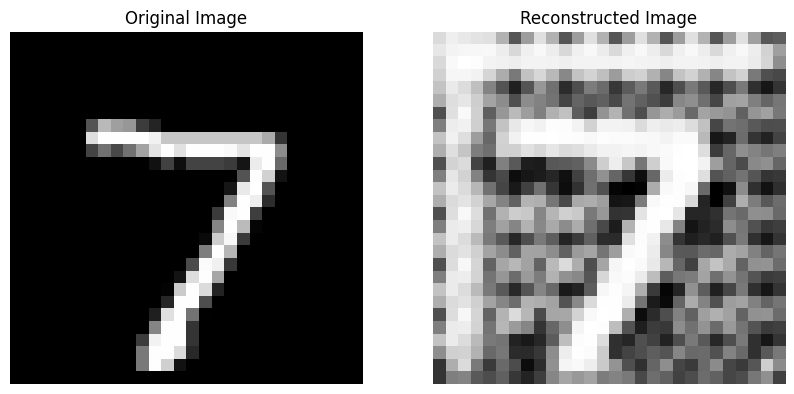

In [25]:
# Load the trained model
model = Autoencoder()
model.load_state_dict(torch.load('autoencoder.pth'))  # Load model weights
model.eval()  # Set to evaluation mode

# Function to load and preprocess data from CSV
def load_data_from_csv(csv_path):
    df = pd.read_csv(csv_path)
    # Assuming each row is a flattened image, with values ranging from 0 to 255
    images = df.iloc[:,1:].values # Select all columns except the first one
    # Normalize pixel values to range [0, 1]
    images = images / 255.0
    # Reshape images to (N, 1, 28, 28) where N is the number of images
    images = images.reshape(-1, 1, 28, 28)
    return torch.tensor(images, dtype=torch.float32)

# Path to the CSV file
csv_path = '/content/mnist_test.csv'  # Replace with your CSV file path

# Load and preprocess the data
data = load_data_from_csv(csv_path)
data_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(data), batch_size=1)

# Run inference and visualize results
for batch in data_loader:
    img, = batch
    with torch.no_grad():
        reconstructed = model(img)

    # Convert tensors to numpy arrays for visualization
    img_np = img.squeeze().numpy()
    reconstructed_np = reconstructed.squeeze().numpy()

    # Plot the original and reconstructed images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img_np, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Reconstructed Image')
    plt.imshow(reconstructed_np, cmap='gray')
    plt.axis('off')

    plt.show()
    break  # Remove this if you want to visualize all images in the CSV

Epoch [1/10], Loss: 1.2405
Epoch [2/10], Loss: 1.2382
Epoch [3/10], Loss: 1.2360
Epoch [4/10], Loss: 1.2338
Epoch [5/10], Loss: 1.2315
Epoch [6/10], Loss: 1.2291
Epoch [7/10], Loss: 1.2265
Epoch [8/10], Loss: 1.2238
Epoch [9/10], Loss: 1.2209
Epoch [10/10], Loss: 1.2178


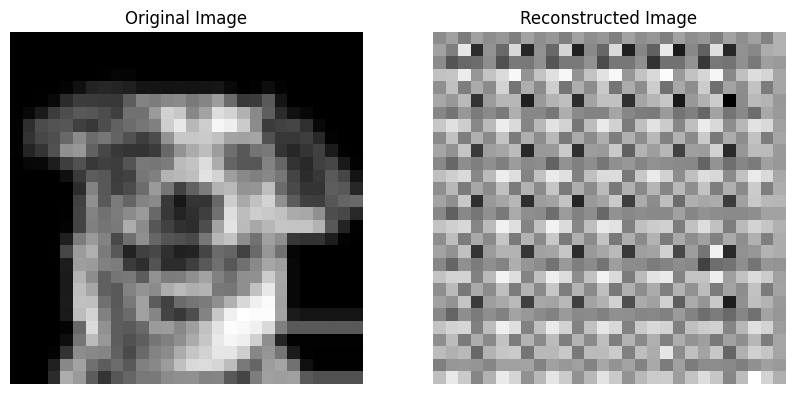

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define the Autoencoder network
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 4, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(4, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  # Ensure output is between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

    def encode(self, x):
        return self.encoder(x)

    def decode(self, x):
        return self.decoder(x)

# Hyperparameters
batch_size = 64
learning_rate = 1e-3
num_epochs = 10

# Define transforms
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load and preprocess the image
def load_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image

# Initialize model, loss function, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Path to your image
image_path = '/content/dog.png'  # Replace with your image path

# Load and preprocess the image
image = load_image(image_path)

# Training loop
for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output, image)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Get hidden vector and reconstruct image
model.eval()
with torch.no_grad():
    hidden_vector = model.encode(image)  # Get the latent representation
    reconstructed_image = model.decode(hidden_vector)  # Reconstruct the image

# Convert tensors to numpy arrays for visualization
image_np = image.squeeze().numpy()
reconstructed_np = reconstructed_image.squeeze().numpy()

# Plot the original and reconstructed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_np, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(reconstructed_np, cmap='gray')
plt.axis('off')

plt.show()